### **DIAMOND DATASET**

In [1]:
# All Import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
df = pd.read_csv('diamonds-2.csv')

drop_col = 'Unnamed: 0'
df.drop(drop_col, axis=1, inplace=True)
df.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200.0
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200.0
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200.0
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200.0
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200.0


In [3]:
df.isnull().sum()

cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  1
table_percent                  1
meas_length                    1
meas_width                     1
meas_depth                     1
girdle_min                     1
girdle_max                     1
fluor_color                    1
fluor_intensity                1
fancy_color_dominant_color     1
fancy_color_secondary_color    1
fancy_color_overtone           1
fancy_color_intensity          1
total_sales_price              1
dtype: int64

In [4]:
# there is only 1 null feature having 1 null value replace it by taking mode

mode_for_total_sales_price = df['total_sales_price'].mode().iloc[0]

df['total_sales_price'].fillna(mode_for_total_sales_price, inplace=True)

In [5]:
df.describe(include='O').T

,count,unique,top,freq
cut,182377,11,Round,138931
color,182377,11,E,28998
clarity,182377,11,SI1,31556
cut_quality,182377,6,Excellent,108359
lab,182377,3,GIA,167406
symmetry,182377,5,Excellent,109306
polish,182377,5,Excellent,145186
eye_clean,182377,5,unknown,126697
culet_size,182377,9,N,107799
culet_condition,182377,5,unknown,170887


In [6]:
df.columns

Index(['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab',
       'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition',
       'depth_percent', 'table_percent', 'meas_length', 'meas_width',
       'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')

## visulaize

In [7]:
one_carat_diamonds = df.loc[df['carat_weight'].between(.9, 1.2)].reindex()

In [8]:
one_carat_wi_range = one_carat_diamonds.loc[df['total_sales_price'].between(1800, 12000)].reindex()

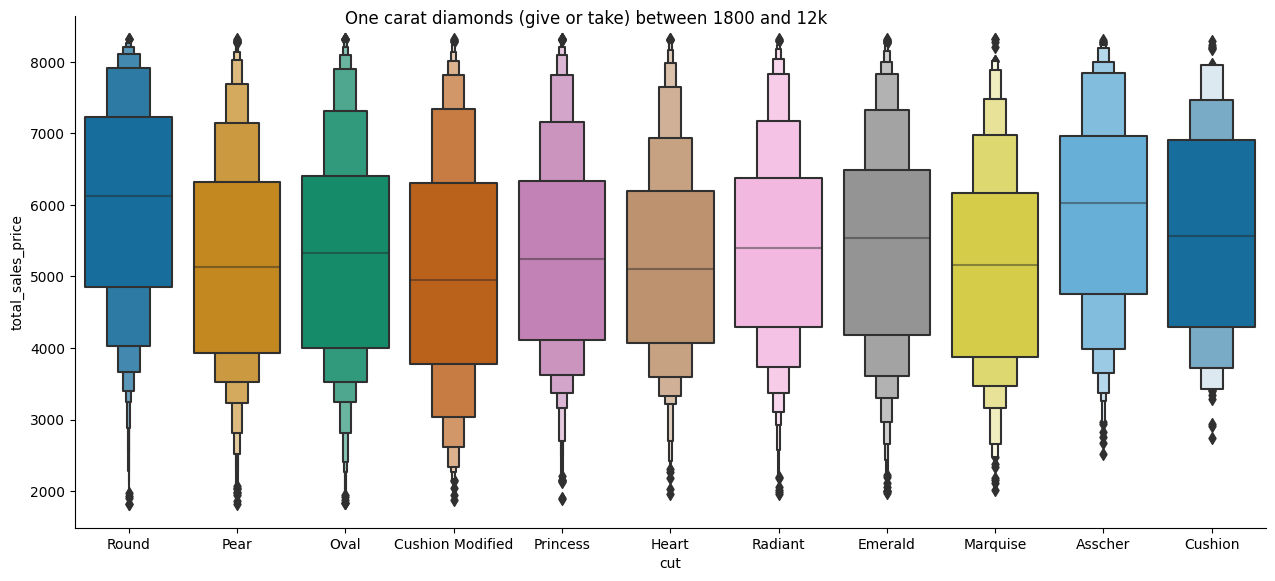

In [9]:
f=sns.catplot(data=one_carat_wi_range, x="cut", y="total_sales_price",
              kind="boxen", color=".9",  palette="colorblind")

f.figure.set_size_inches(15, 6)
f.fig.suptitle('One carat diamonds (give or take) between 1800 and 12k');

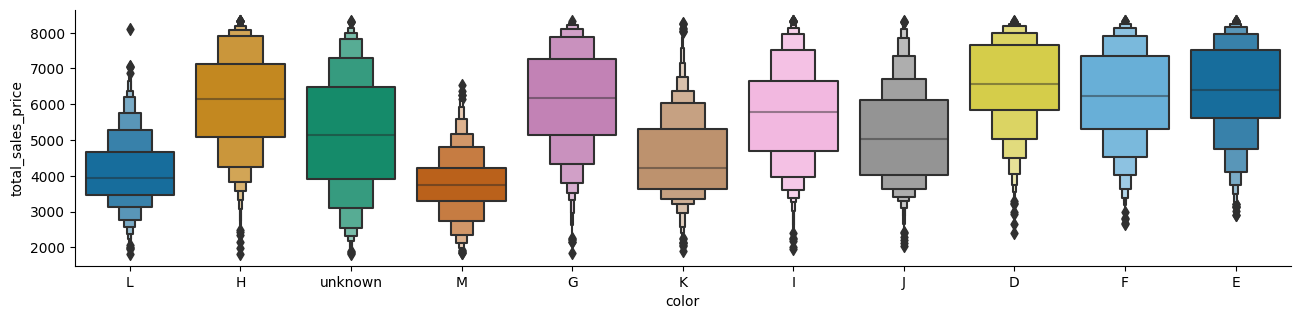

In [10]:
sns.set_palette(palette="light:#edf5dc", n_colors=11)
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'fancy']
f=sns.catplot(data=one_carat_wi_range, x="color", y="total_sales_price",
              kind="boxen",  palette="colorblind")

f.figure.set_size_inches(15, 3)

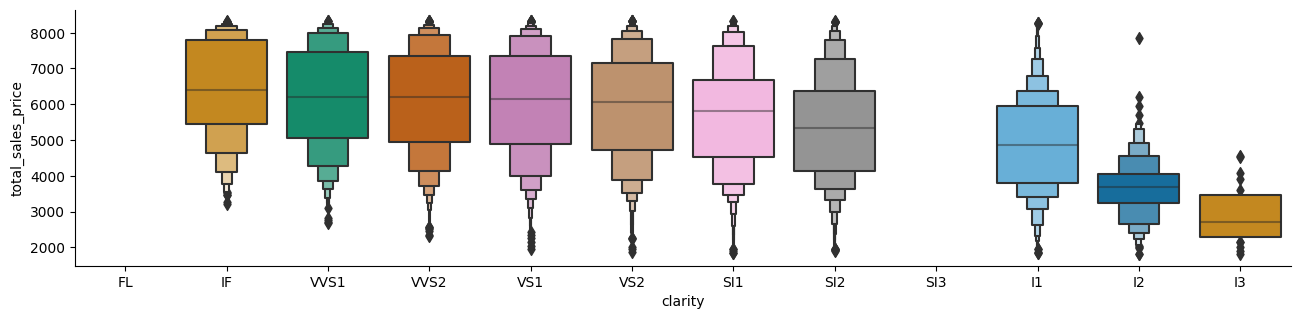

In [11]:
sns.set_palette(palette='colorblind', n_colors=12)
clarities = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'SI3', 'I1', 'I2', 'I3']
f=sns.catplot(data=one_carat_wi_range, x="clarity", y="total_sales_price",
              kind="boxen", order=clarities)

f.figure.set_size_inches(15, 3)

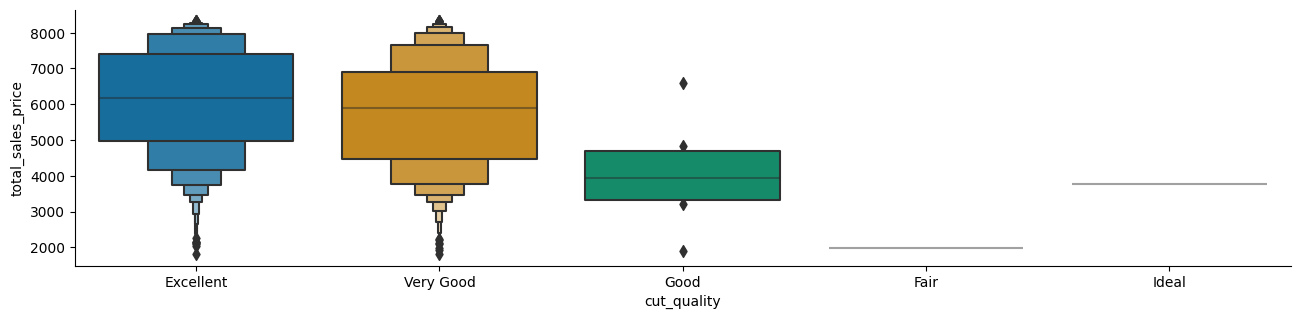

In [12]:
cut_qualities =['Excellent', 'Very Good', 'Good', 'Fair', 'Ideal']
sns.set_palette(palette='colorblind', n_colors=5)
f=sns.catplot(data=one_carat_wi_range, x="cut_quality", y="total_sales_price",
              kind="boxen", order=cut_qualities)

f.figure.set_size_inches(15, 3)

In [13]:
categorical_columns = ['color', 'clarity', 'cut_quality','symmetry', 'polish', 'culet_size', 'girdle_min', 'girdle_max']


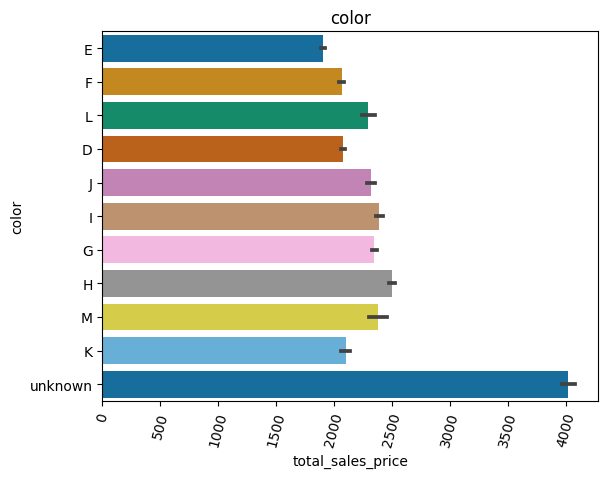

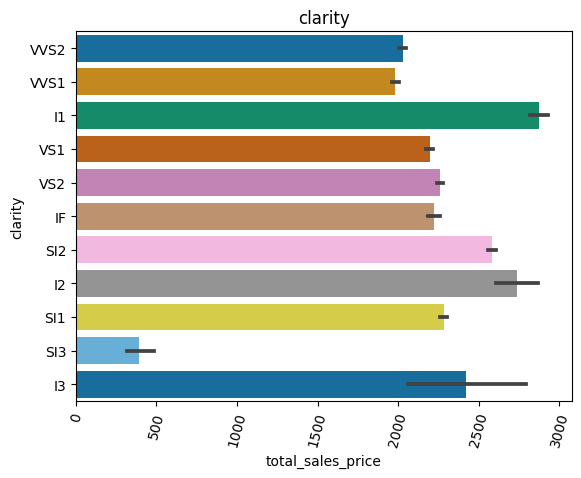

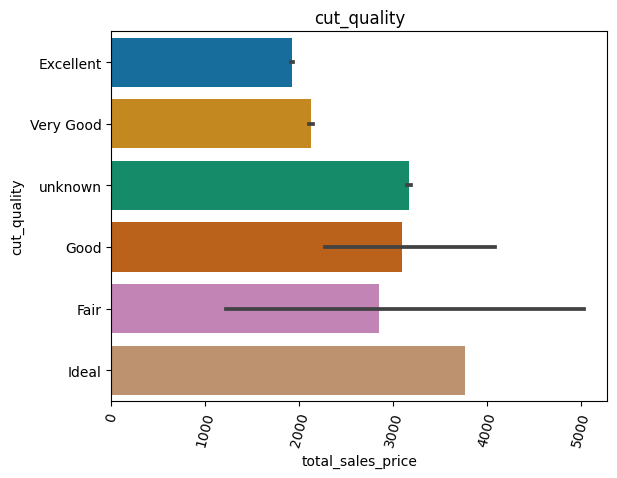

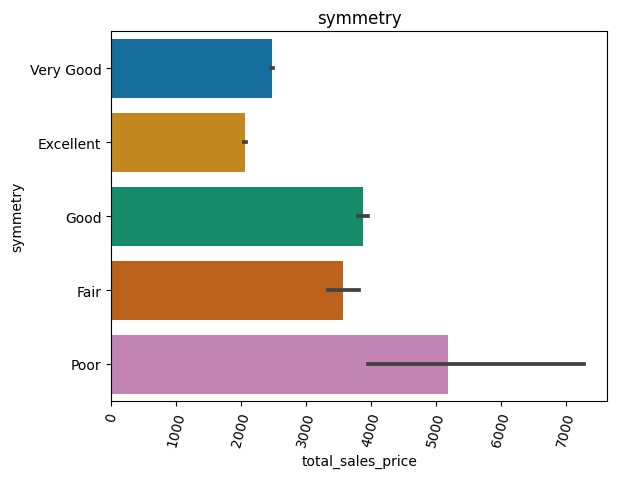

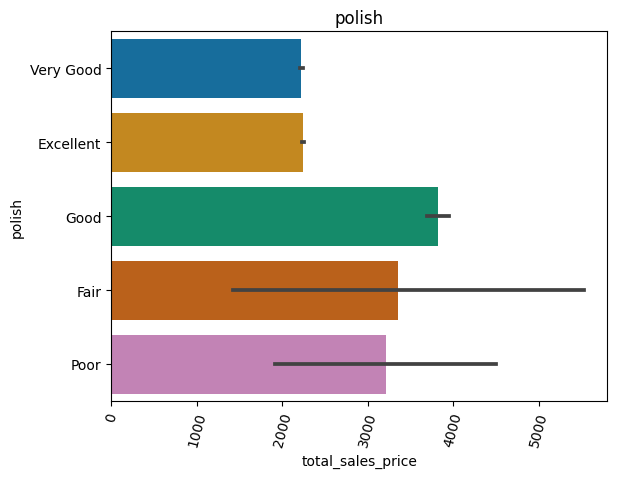

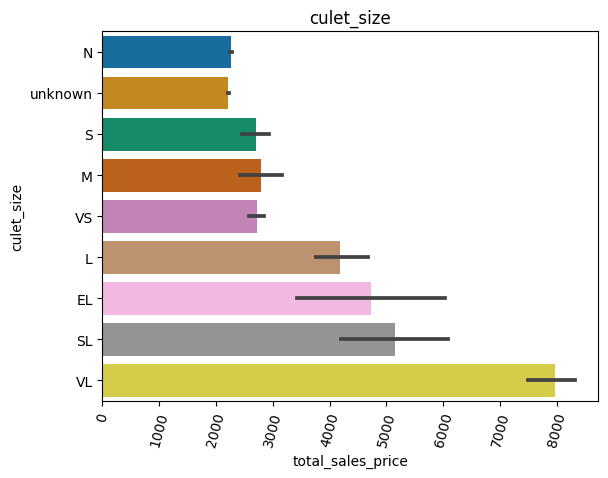

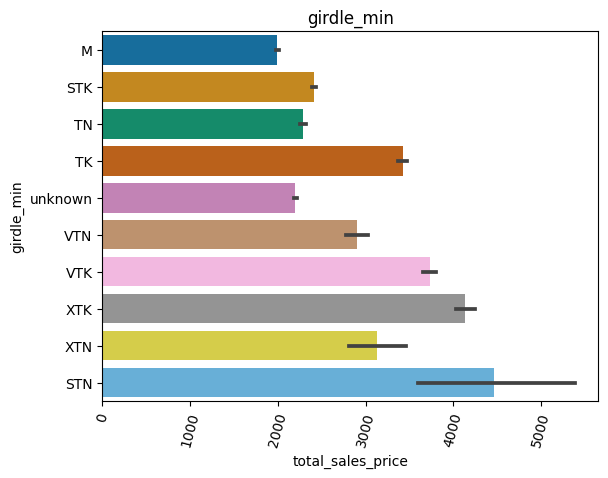

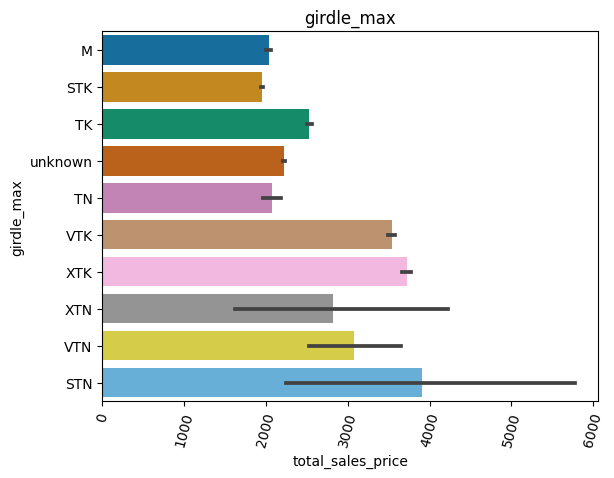

In [14]:
for cat in categorical_columns:
    sns.barplot(df,x='total_sales_price',y=cat,palette="colorblind")
    plt.xticks(rotation=75)
    plt.title(cat)

    plt.show()

In [15]:
numerical_features = ['carat_weight', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth']

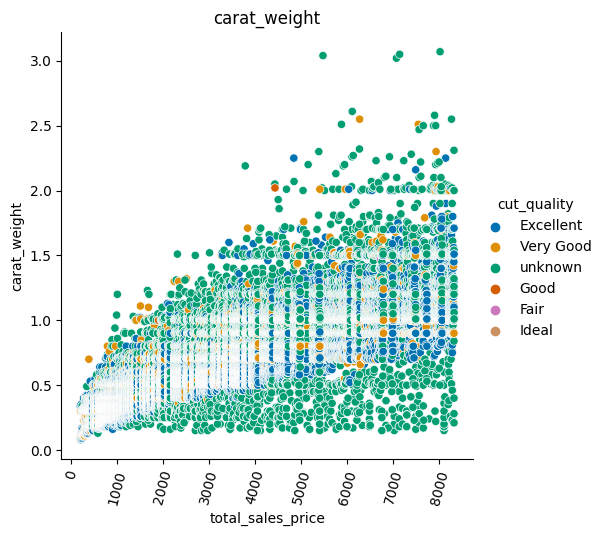

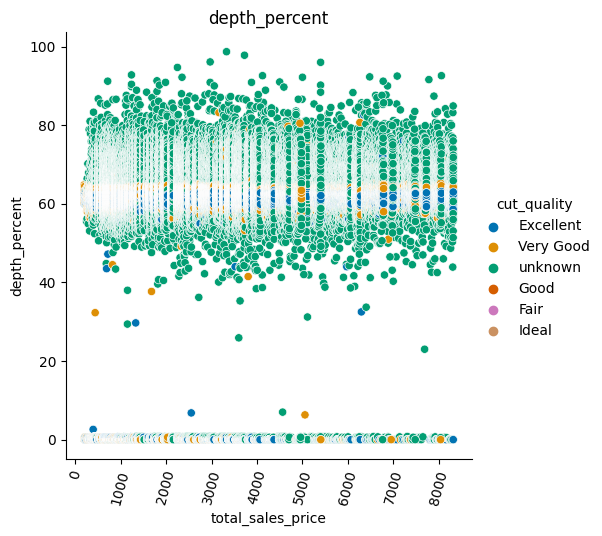

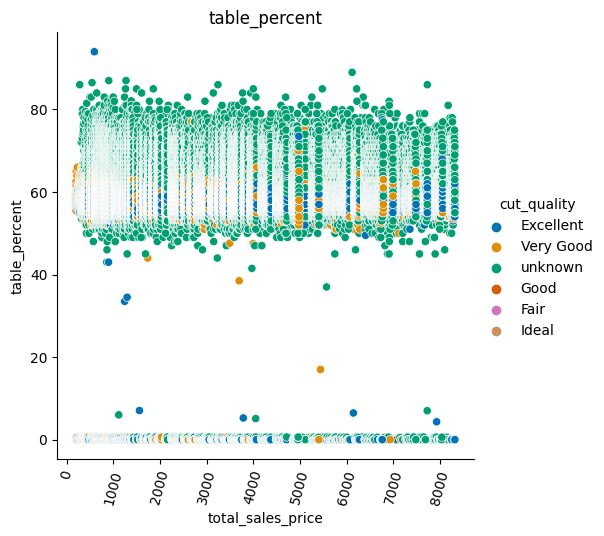

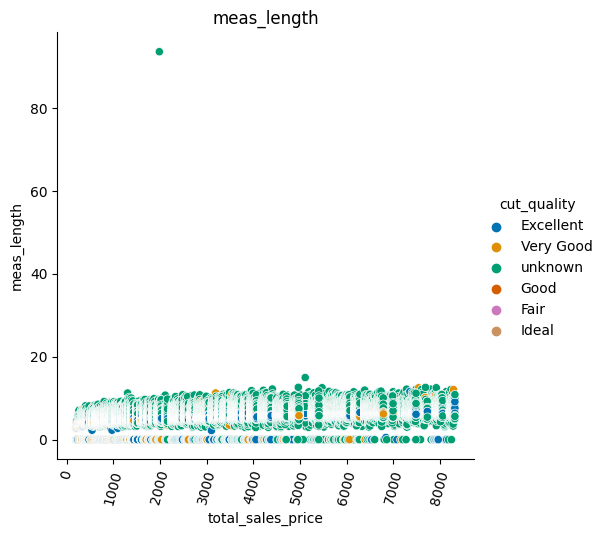

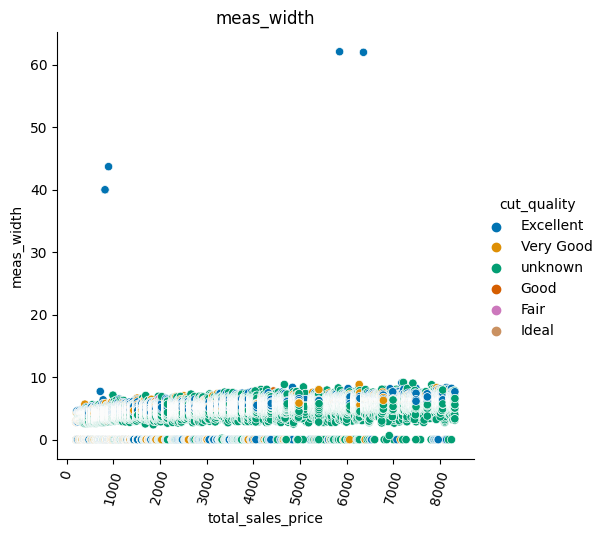

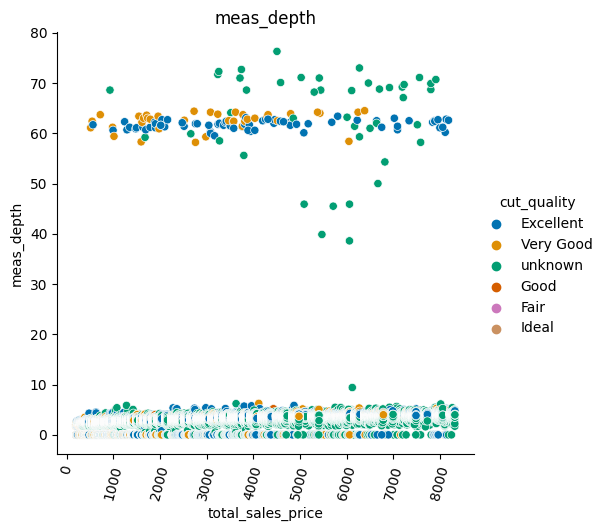

In [16]:
for cat in numerical_features:
    sns.relplot(df,x='total_sales_price',y=cat, hue= 'cut_quality',palette="colorblind" )
    plt.xticks(rotation=75)
    plt.title(cat)

    plt.show()

In [17]:
corr = df.corr(method='pearson')
corr.style.background_gradient(cmap ='coolwarm')

<ipython-input-17-7675ed246d9d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')


,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
carat_weight,1.000000,0.068315,0.065004,0.728826,0.689401,0.260080,0.893367
depth_percent,0.068315,1.000000,0.662243,0.160416,0.158385,0.080629,0.051331
table_percent,0.065004,0.662243,1.000000,0.172947,0.143655,0.064505,0.042939
meas_length,0.728826,0.160416,0.172947,1.000000,0.637944,0.217023,0.644365
meas_width,0.689401,0.158385,0.143655,0.637944,1.000000,0.301304,0.647483
meas_depth,0.260080,0.080629,0.064505,0.217023,0.301304,1.000000,0.247597
total_sales_price,0.893367,0.051331,0.042939,0.644365,0.647483,0.247597,1.000000


In [18]:
# as instead of having null value there is unknown value in every columns

def count_for_null_values(columns):
  for col in columns:
    counts = (df[col] == 'unknown').sum()
    print(f'{col}:  {counts}')

print('No of Rows: ', df.shape[0])
print('--------------------------')
count_for_null_values(df.columns)

No of Rows:  182377
--------------------------
cut:  0
color:  5172
clarity:  0
carat_weight:  0
cut_quality:  43086
lab:  0
symmetry:  0
polish:  0
eye_clean:  126697
culet_size:  73147
culet_condition:  170887
depth_percent:  0
table_percent:  0
meas_length:  0
meas_width:  0
meas_depth:  0
girdle_min:  72168
girdle_max:  72751
fluor_color:  170766
fluor_intensity:  44
fancy_color_dominant_color:  177202
fancy_color_secondary_color:  181815
fancy_color_overtone:  181051
fancy_color_intensity:  177204
total_sales_price:  0


### **Handling the unknown values**

In [19]:
temp_df = df.copy()

In [20]:
# color feature
# for color columns we will take the mode value

mode_for_feature_color = temp_df['color'].mode()[0]
temp_df['color'].replace('unknown', mode_for_feature_color, inplace=True)
(temp_df['color'] == 'unknown').sum() # check for null or unknown value

0

In [21]:
# cut_quality feature
# obtain the values either through the 4 C's of diamond or -- > #1
# through the features like Symmetry, Polish, Clarity --- > #2

import pandas as pd

diamonds = temp_df
diamonds['cut_quality'] = diamonds['cut_quality'].replace('unknown', pd.NA)

# Calculate the overall mode value of 'cut_quality' for non-null values
overall_mode_for_cut_quality = diamonds['cut_quality'].dropna().mode().iloc[0]

# Filter out rows with null 'cut_quality' values
filtered_diamonds = diamonds.dropna(subset=['cut_quality'])

# Create a dictionary to map unique combinations to 'cut_quality'
unique_combinations = filtered_diamonds[['symmetry', 'polish', 'clarity', 'cut_quality']].drop_duplicates()

# Create a dictionary to map unique combinations to 'cut_quality'
unique_combinations = diamonds[['symmetry', 'polish', 'clarity', 'cut_quality']].drop_duplicates()

# Convert NumPy arrays to tuples for use as dictionary keys
unique_combinations['key'] = list(zip(unique_combinations['symmetry'],
                                      unique_combinations['polish'],
                                      unique_combinations['clarity'],))

combination_to_cut_quality = dict(zip(unique_combinations['key'], unique_combinations['cut_quality']))

# Define a function to fill missing 'cut_quality' values
def fill_missing_cut_quality(row):
    if pd.isna(row['cut_quality']):
        key = (row['symmetry'], row['polish'], row['clarity'])
        if key in combination_to_cut_quality:
            if pd.notna(combination_to_cut_quality.get(key)):
                return combination_to_cut_quality[key]
        return overall_mode_for_cut_quality
    return row['cut_quality']

# Apply the function to fill missing 'cut_quality' values
diamonds['cut_quality'] = diamonds.apply(fill_missing_cut_quality, axis=1)
diamonds['cut_quality'] = diamonds['cut_quality'].replace(pd.NA, 'unknown')
temp_df = diamonds

In [22]:
temp_df['cut_quality']

0         Excellent
1         Very Good
2         Excellent
3         Excellent
4         Very Good
            ...    
182372    Excellent
182373    Excellent
182374    Very Good
182375    Excellent
182376    Very Good
Name: cut_quality, Length: 182377, dtype: object

In [23]:
# culet_size
# we will take the mode for it

mode_for_feature_culet_size = temp_df['culet_size'].mode()[0]
temp_df['culet_size'].replace('unknown', mode_for_feature_culet_size, inplace=True)
(temp_df['culet_size'] == 'unknown').sum() # check for null or unknown value

0

In [24]:
# griddle_min/max
# as this feature can only be derived from the physical attributes such as
# measurements, proportions, analysis or detailed gemological analysis
# we will choose the mode value of the feature to fill the null value or unknown value

gridle_min_without_unknown = temp_df[temp_df['girdle_min'] != 'unknown']
gridle_max_without_unknown = temp_df[temp_df['girdle_max'] != 'unknown']

mode_for_feature_girdle_min = gridle_min_without_unknown['girdle_min'].mode()[0]
mode_for_feature_girdle_max = gridle_max_without_unknown['girdle_max'].mode()[0]

temp_df['girdle_min'].replace('unknown', mode_for_feature_girdle_min, inplace=True)
temp_df['girdle_max'].replace('unknown', mode_for_feature_girdle_max, inplace=True)

print("Unknown in Girdle Min", (temp_df['girdle_min'] == 'unknown').sum()) # check for null or unknown value for girdle_min
print("Unknown in Girdle Max", (temp_df['girdle_min'] == 'unknown').sum()) # check for null or unknown value for girdle_max


Unknown in Girdle Min 0
Unknown in Girdle Max 0


In [25]:
# Removal of the below feature is beacause of presence of null values more than half of the total entites.
# eye_clean is also remove because of the as it is almost null for half of entites and also that is indepenent from person to person.
# In below there are also the features which are dependent feature of removed feature so we must have to remove those.

temp_df = temp_df.drop(columns=['eye_clean',
                      'culet_condition',
                      'fluor_color',
                      'fluor_intensity',
                      'fancy_color_dominant_color',
                      'fancy_color_secondary_color',
                      'fancy_color_overtone',
                      'fancy_color_intensity'])
temp_df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,M,M,200.0
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,STK,STK,200.0
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,61.1,59.0,2.88,2.90,1.77,TN,M,200.0
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.0,59.0,2.86,2.88,1.78,M,STK,200.0
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,STK,STK,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182372,Pear,J,I1,1.51,Excellent,GIA,Excellent,Excellent,N,65.9,60.0,9.85,6.24,4.11,M,STK,8318.0
182373,Oval,J,SI2,1.51,Excellent,HRD,Excellent,Excellent,N,0.0,0.0,9.15,6.55,3.92,M,STK,8318.0
182374,Princess,F,VS1,1.01,Very Good,GIA,Excellent,Excellent,N,71.8,71.0,5.61,5.59,4.01,M,TK,8318.0
182375,Pear,E,VVS2,2.00,Excellent,GIA,Good,Excellent,N,60.6,55.0,10.88,6.58,3.99,M,STK,8318.0


## **Encode categorical variables using techniques like one-hot encoding or label encoding**

In [26]:
# encoding can be done in two different ways
# for nominal attributes we use one-hot encoding
# for ordinal attributes we use label encoding


# below is the one-hot encoding
temp_df = pd.get_dummies(temp_df, columns=['cut', 'lab'], prefix=["cut", "lab"])

temp_df.head()

,color,clarity,carat_weight,cut_quality,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,...,cut_Heart,cut_Marquise,cut_Oval,cut_Pear,cut_Princess,cut_Radiant,cut_Round,lab_GIA,lab_HRD,lab_IGI
0,E,VVS2,0.09,Excellent,Very Good,Very Good,N,62.7,59.0,2.85,...,0,0,0,0,0,0,1,0,0,1
1,E,VVS2,0.09,Very Good,Very Good,Very Good,N,61.9,59.0,2.84,...,0,0,0,0,0,0,1,0,0,1
2,E,VVS2,0.09,Excellent,Very Good,Very Good,N,61.1,59.0,2.88,...,0,0,0,0,0,0,1,0,0,1
3,E,VVS2,0.09,Excellent,Very Good,Very Good,N,62.0,59.0,2.86,...,0,0,0,0,0,0,1,0,0,1
4,E,VVS2,0.09,Very Good,Very Good,Excellent,N,64.9,58.5,2.79,...,0,0,0,0,0,0,1,0,0,1


In [27]:
# below is the label encoding for the ordinal attributes
features_to_encode = ['color', 'clarity', 'cut_quality','symmetry', 'polish', 'culet_size', 'girdle_min', 'girdle_max']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through the selected features and apply label encoding
for feature in features_to_encode:
    temp_df[feature] = label_encoder.fit_transform(temp_df[feature])

temp_df.head()

,color,clarity,carat_weight,cut_quality,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,...,cut_Heart,cut_Marquise,cut_Oval,cut_Pear,cut_Princess,cut_Radiant,cut_Round,lab_GIA,lab_HRD,lab_IGI
0,1,10,0.09,0,4,4,3,62.7,59.0,2.85,...,0,0,0,0,0,0,1,0,0,1
1,1,10,0.09,4,4,4,3,61.9,59.0,2.84,...,0,0,0,0,0,0,1,0,0,1
2,1,10,0.09,0,4,4,3,61.1,59.0,2.88,...,0,0,0,0,0,0,1,0,0,1
3,1,10,0.09,0,4,4,3,62.0,59.0,2.86,...,0,0,0,0,0,0,1,0,0,1
4,1,10,0.09,4,4,0,3,64.9,58.5,2.79,...,0,0,0,0,0,0,1,0,0,1


In [28]:
temp_df.columns

Index(['color', 'clarity', 'carat_weight', 'cut_quality', 'symmetry', 'polish',
       'culet_size', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth', 'girdle_min', 'girdle_max',
       'total_sales_price', 'cut_Asscher', 'cut_Cushion',
       'cut_Cushion Modified', 'cut_Emerald', 'cut_Heart', 'cut_Marquise',
       'cut_Oval', 'cut_Pear', 'cut_Princess', 'cut_Radiant', 'cut_Round',
       'lab_GIA', 'lab_HRD', 'lab_IGI'],
      dtype='object')

## **EDA**

In [29]:
temp_df.describe()

,color,clarity,carat_weight,cut_quality,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,...,cut_Heart,cut_Marquise,cut_Oval,cut_Pear,cut_Princess,cut_Radiant,cut_Round,lab_GIA,lab_HRD,lab_IGI
count,182377.000000,182377.000000,182377.000000,182377.000000,182377.000000,182377.000000,182377.000000,182376.000000,182376.000000,182376.00000,...,182377.000000,182377.000000,182377.000000,182377.000000,182377.000000,182377.000000,182377.000000,182377.000000,182377.000000,182377.000000
mean,3.020759,6.612210,0.504222,0.997050,1.569315,0.804986,3.021505,61.434736,57.367587,5.03997,...,0.020501,0.013905,0.052984,0.039786,0.028913,0.018555,0.761779,0.917912,0.009453,0.072635
std,2.336261,2.527714,0.268945,1.639512,1.936964,1.597073,0.289790,10.144797,10.211576,1.18837,...,0.141708,0.117098,0.224001,0.195456,0.167561,0.134947,0.425996,0.274500,0.096766,0.259538
min,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,0.300000,0.000000,0.000000,0.000000,3.000000,61.200000,57.000000,4.30000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,3.000000,7.000000,0.400000,0.000000,0.000000,0.000000,3.000000,62.400000,58.000000,4.77000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,5.000000,9.000000,0.600000,2.000000,4.000000,0.000000,3.000000,63.300000,60.000000,5.55000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,9.000000,10.000000,3.070000,4.000000,4.000000,4.000000,7.000000,98.700000,94.000000,93.66000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
temp_df = temp_df.drop(columns=['depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth', 'girdle_min', 'girdle_max','lab_GIA', 'lab_HRD', 'lab_IGI'])

In [31]:
temp_df.columns

Index(['color', 'clarity', 'carat_weight', 'cut_quality', 'symmetry', 'polish',
       'culet_size', 'total_sales_price', 'cut_Asscher', 'cut_Cushion',
       'cut_Cushion Modified', 'cut_Emerald', 'cut_Heart', 'cut_Marquise',
       'cut_Oval', 'cut_Pear', 'cut_Princess', 'cut_Radiant', 'cut_Round'],
      dtype='object')

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a 'total_sales_price' column as the target variable
X = temp_df.drop(columns=['total_sales_price'])  # Features
y = df['total_sales_price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for SGD)
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [48]:
# Create an instance of the SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01, random_state=42, l1_ratio=0)

# Train the model on the training data
sgd_regressor.fit(X_train, y_train)

SGDRegressor(l1_ratio=0, learning_rate='constant', random_state=42)

In [49]:
y_pred = sgd_regressor.predict(X_test)

In [50]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = sgd_regressor.score(X_test, y_test)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 831458.6133302448
Root Mean Squared Error: 911.8435245864528


## Lasso

In [51]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [52]:
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength) parameter


In [53]:
lasso_model.fit(X_train_normalized, y_train)


Lasso()

In [54]:
y_pred = lasso_model.predict(X_test_normalized)


In [55]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 529196.4268777543
Root Mean Squared Error: 727.4588832901516


### KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
scaler = StandardScaler()
X_train_scaled_knn = scaler.fit_transform(X_train)
X_test_scaled_knn = scaler.transform(X_test)

In [58]:
k = 3  # You can choose any value for k
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [59]:
knn_classifier.fit(X_train_scaled_knn, y_train)


KNeighborsClassifier(n_neighbors=3)

In [60]:
y_pred = knn_classifier.predict(X_test_scaled_knn)


In [62]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 395925.21159118327
Root Mean Squared Error: 629.2258828045643
